***BARILLER Halvard*** <br>
***MVA 23/24***


# <center> Computational Statistics 
## <center> Homework 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

## Exercise 1: Box-Muller and Marsaglia-Bray algorithms

In [3]:
def gaussian_sampling(n_samples = 1000):

    X = []
    Y = []

    for i in range(n_samples):
        # Sampling Theta
        theta = np.random.uniform(0, 2*np.pi)

        # Sampling R
        u = np.random.uniform(0, 1)
        r = np.sqrt(-2 * np.log(1 - u))

        # Calculating x and y
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        X.append(x)
        Y.append(y)

        # Plotting
        plt.plot(x, y, 'bo')
    
    plt.axis('equal')
    plt.title("Gaussian Sampling")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    return X, Y
    

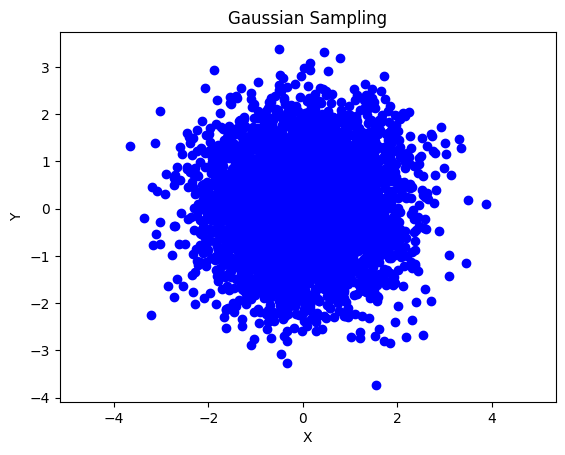

X is of mean -0.003753207592554017  and of variance 0.9948572680603258
Y is of mean 0.028620360969561057  and of variance 0.9737977239673657


In [4]:
X, Y = gaussian_sampling(5000)
print("X is of mean", np.mean(X), " and of variance", np.var(X))
print("Y is of mean", np.mean(Y), " and of variance", np.var(Y))

## Exercise 3: Stochastic Gradient Learning in Neural Networks

### **Question 1 :** *Describe the stochastic gradient descent algorithm for minimizing the empirical risk and implement it.*

The stochastic gradient descent is an optimization algorithm used in supervised learning to minimize a loss function defined over a set of input-output pairs. <br>
Here, we consider the empiral risk $R_n : \mathbb{R}^d \rightarrow \mathbb{R}_+\ $ defined as follows:
$$ 
R_n(w) = \frac{1}{n} \sum_{i=1}^n \ell(w; x_i, y_i) = \frac{1}{n} \sum_{i=1}^n (y_i - w^tx_i)^2
$$
where $w \in \mathbb{R}^d$ is the parameter vector, $x_i \in \mathbb{R}^d$ is the $i^{th}$ input sample and $y_i \in \{-1,1\}$ is the $i^{th}$ output sample.

In order to minimize the empirical risk, the most common method is to use the gradient descent algorithm. The gradient descent algorithm is an iterative method that starts with an initial guess $w_0$ and then updates the parameter vector $w$ at each iteration $k$ as follows:
$$
w_{k+1} \leftarrow w_k - \alpha_k \nabla R_n(w_k) = w_k - \frac{\alpha_k}{n} \sum_{i=1}^n \nabla \ell(w_k; x_i, y_i)
$$
where $\alpha_k$ is the learning rate and $\nabla R_n(w_k)$ is the gradient of the empirical risk at $w_k$. This ensures to find at least a local minimum to the problem. However, computing the gradient of the empirical risk requires to compute the gradient of the loss function $\ell$ for each sample $x_i$ at each step $k$. This can be very costly when the number of samples $n$ is large. Moreover, when the problem is not convex, this kind of algorithm is sensitive to the parameters' initialisation and is more prone to get stuck in local minima. <br>

To address these issues, another method known as stochastic gradient descent can be used. The idea is to compute the gradient of the empirical risk only for a subset of the samples (called a mini-batch) at each step $k$. This reduces the computational cost of the algorithm. Moreover, the mini-batch is randomly selected at each step $k$, hence the term stochastic, which allows to avoid getting stuck in local minima. The update rule of the SGD algorithm is as follows:
\begin{align*}
w_{k+1} \leftarrow w_k - \alpha_k \nabla R_{n_k}(w_k) & = w_k - \frac{\alpha_k}{n_k} \sum_{i \in I_k} \nabla \ell(w_k; x_i, y_i) \\
\end{align*}
where $I_k$ is the set of indices of the samples in the mini-batch randomly sampled at step $k$ and $n_k$ is the size of the mini-batch. <br>
The term stochastic gradient descent usually refers to the aforedescribed algorithm using mini-batch of size 1. When minimizing the empirical risk with respect to the mean square error loss function, the problem is convex and the update rule of the SGD algorithm is as follows:
\begin{align*}
\begin{cases}
\nabla \ell(w_k; x_{i_k}, y_{i_k}) & = - 2 (y_{i_k} - w_k^t x_{i_k}) \\
w_{k+1} & \leftarrow w_k - \alpha_k \nabla \ell(w_k; x_{i_k}, y_{i_k}) = w_k - 2 \alpha_k x_{i_k} (w_k^t x_{i_k} - y_{i_k}) \\
\end{cases}
\end{align*}

This method will have a more erratic behaviour than the gradient descent algorithm since only one sample (or a subset of the samples) is used to compute the gradient at each step: the descent is made in expectation. However, the gradient computation is considerably faster than in gradient descent and this has been empirically shown to be less prone to get stuck in local minima.<br>

[[BCN16](https://arxiv.org/pdf/1606.04838.pdf)] Léon Bottou, Frank E. Curtis, and Jorge Nocedal. Optimization methods for large- scale machine learning. eprint arXiv :1606.04838, 2016. <br>
[[Bot91](https://leon.bottou.org/publications/pdf/nimes-1991.pdf)] Léon Bottou. Stochastic gradient learning in neural networks. In Neuro-Nîmes 91, 1991. <br>

In [5]:
def sgd_empirical_risk(X, Y, learning_rate = 1e-3, err = 1e-5, max_iter = 5000, plot = True):
    
    # Initializing w
    w = np.random.randn(X.shape[1])
    niter = 0
    n_samples = X.shape[0]
    assert n_samples == Y.shape[0]
    E = []

    while True:
        niter += 1
        if niter > max_iter:
            # print("Maximum number of iterations reached")
            break
        # Stochastic selection of a sample
        random_idx = np.random.randint(0, n_samples)
        x = X[random_idx]
        y = Y[random_idx]
        w_old = w
        # Parameter update
        w = w - 2 * learning_rate * (np.dot(x, w) - y) * x


        # Error calculation
        E.append(np.linalg.norm(w - w_old))
        # if np.linalg.norm(w - w_old) < err:
        #     print("Error threshold reached at iteration", niter, "with error", np.linalg.norm(w - w_old))
        #     break
    
    if plot:
        plt.plot(E)
        plt.title("Error evolution")
        plt.xlabel("Iteration")
        plt.ylabel("Error")
        plt.show()

    return w
    


I first wrote the code using a stopping criterion based on the norm of the gradient update between two steps like used in gradient descent. However, the algorithm was not converging to the correct solution in question 3, and I'm not sure to understand why. I used a fixed number of iterations instead which worked way better. <br>

### **Question 2 :** *Sample a set of observations $\{z_i\}^n_{i=1}$ by generating a collection of random points $x_i$ of $\mathbb{R}^2$, $\bar{w} \in \mathbb{R}^2 $ seen as the normal vector of an hyperplane, a straight line here, and assigning the label $y_i$ according to the side of the hyperplane where the point $x_i$ is.*

In [6]:
def random_sample(n: int):
    # Generate X in [-1, 1]^2
    X = np.random.rand(n, 2)*2 - 1
    w = np.random.rand(2)
    y = np.zeros(n)
    for i in range(n):
        y[i] = np.sign(np.dot(X[i,:], w))
    return X, y, w

In [7]:
X, Y, w = random_sample(1000)

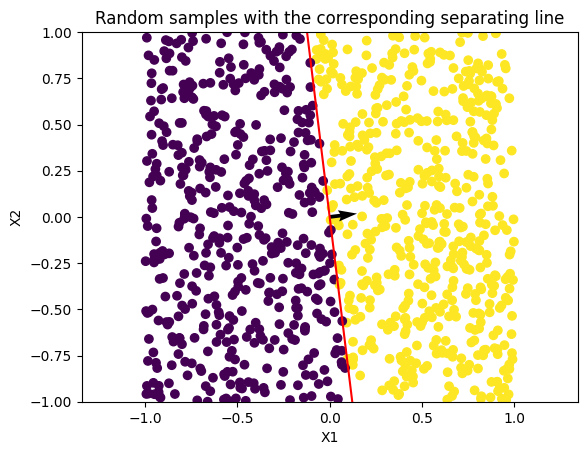

In [8]:
# Plot of the data with y as label of the color
plt.scatter(X[:, 0], X[:, 1], c=Y)

# Plot of the line w assuming (0, 0) is on the line
x = np.linspace(-1, 1, 100)
y = - w[0] / w[1] * x
plt.plot(x, y, 'r')

plt.axis('equal')
plt.title("Random samples with the corresponding separating line")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot of the vector w
plt.quiver(0, 0, w[0], w[1], color='black')


We see in red the hyperplane defined with the normal vector $w$ (in black) and the point $(0,0)$.

**Question 3 :** *Test the algorithm you wrote at the first question over these observations. What is the vector $\hat{w}$ estimated ? Is it far from $\bar{w}$ ?*


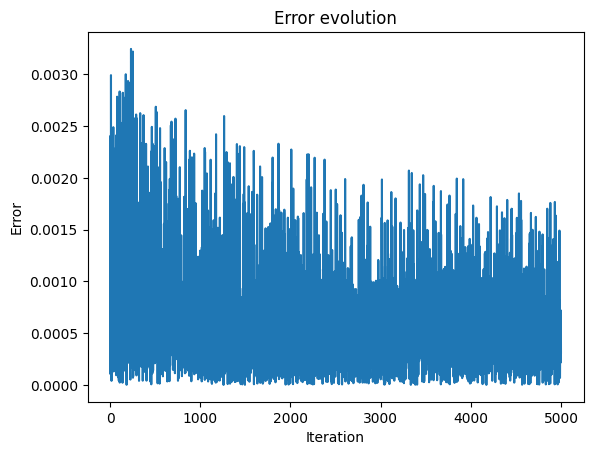

In [9]:
w_hat = sgd_empirical_risk(X, Y, learning_rate = 1e-3, err = 1e-5, max_iter = 5000, plot = True)

In [10]:
print("The norm between the two normalized normal vectors is ", np.linalg.norm(w/np.linalg.norm(w) - w_hat/np.linalg.norm(w_hat)))

The norm between the two normalized normal vectors is  0.04774884171131003


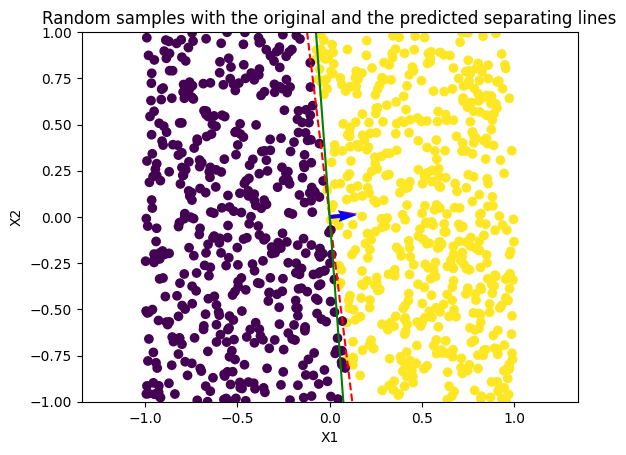

In [11]:
# Plot of the data with y as label of the color
plt.scatter(X[:, 0], X[:, 1], c=Y)

# Plot of the true separating plane
x = np.linspace(-1, 1, 100)
y = - w[0] / w[1] * x
plt.plot(x, y, 'r', linestyle='--')

# Plot of the predicted separating plane
predicted_plane = - w_hat[0] / w_hat[1] * x
plt.plot(x, predicted_plane, 'g')

plt.axis('equal')
plt.title("Random samples with the original and the predicted separating lines")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

#  Plot of the vector w
plt.quiver(0, 0, w[0], w[1], color='r')
# Plot of the vector w_hat
plt.quiver(0, 0, w_hat[0], w_hat[1], color='b')


In green, we see the hyperplane defined with the estimated normal vector $\hat{w}$ (in blue) and the point $(0,0)$, which is very close to the true separating hyperplane (in red) defined with the normal vector $w$. We still see the apparation of classification mistakes.<br>
The Stochastic Gradient Descent algorithm was stopped while converging to a solution very close to the true solution. <br>

In [12]:
y_hat = np.sign(np.dot(X, w_hat))
accuracy = np.sum(y_hat == Y) / len(Y)
print("The accuracy of the prediction over the training set is ", accuracy)

The accuracy of the prediction over the training set is  0.989


### **Question 4 :** *Noise your observations $\{z_i\}^n_{i=1}$ with an additive Gaussian noise and perform the optimisation again. Compare with the result of question 3.*


In [13]:
# Additive Gaussian noise to the data
X_noisy = X + np.random.normal(0, 0.2, X.shape)

# Percentage of misclassified points
y_noisy = np.sign(np.dot(X_noisy, w))
print("The accuracy of the original separating hyperplane over the noisy data is ", np.sum(y_noisy == Y) / len(Y))

The accuracy of the original separating hyperplane over the noisy data is  0.925


(-1.0, 1.0)

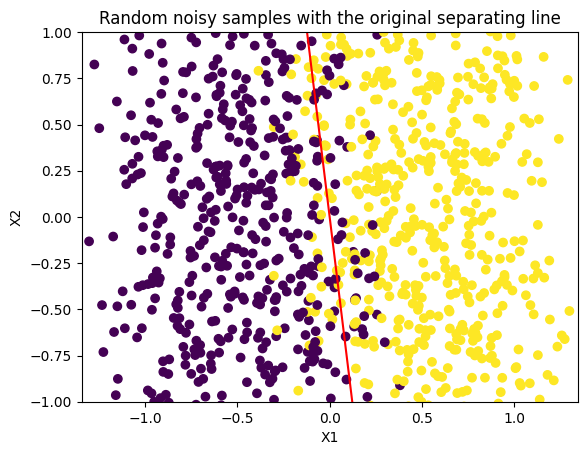

In [14]:
# Plot of the data with y as label of the color
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=Y)

# Plot of the line w assuming (0, 0) is on the line
x = np.linspace(-1, 1, 100)
y = - w[0] / w[1] * x
plt.plot(x, y, 'r')

plt.axis('equal')
plt.title("Random noisy samples with the original separating line")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(-1, 1)
plt.ylim(-1, 1)


We see that due to the Gaussian noise, some points are now on the wrong side of the hyperplane.

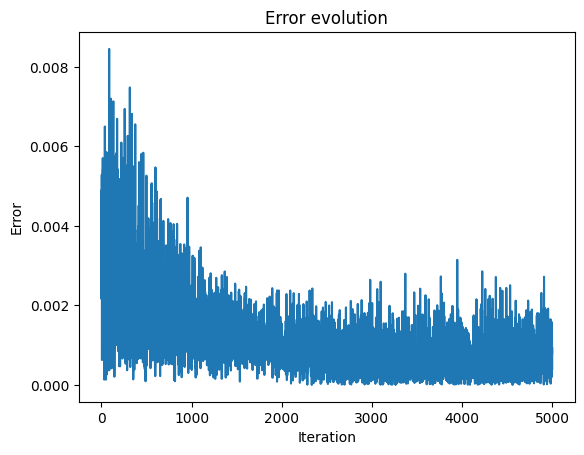

In [15]:
# Estimation of a separating hyperplane for the noisy data
w_hat_noisy = sgd_empirical_risk(X_noisy, Y, learning_rate = 1e-3, err = 1e-5, max_iter = 5000, plot = True)

The accuracy of the predicted separating hyperplane over the noisy data is  0.922


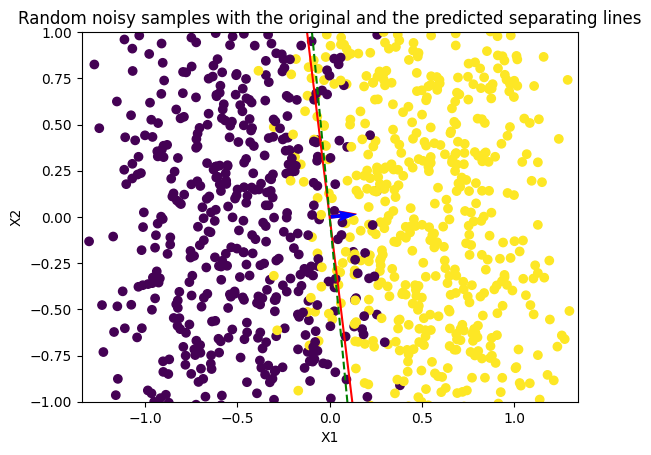

In [16]:
# Plot of the data with y_hat as label of the color
y_hat_noisy = np.sign(np.dot(X_noisy, w_hat_noisy))
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=Y)

# Plot of the true separating plane
x = np.linspace(-1, 1, 100)
y = - w[0] / w[1] * x
plt.plot(x, y, 'r')

# Plot of the predicted separating plane
predicted_plane = - w_hat_noisy[0] / w_hat_noisy[1] * x
plt.plot(x, predicted_plane, 'g', linestyle='--')

plt.axis('equal')
plt.title("Random noisy samples with the original and the predicted separating lines")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

#  Plot of the vector w
plt.quiver(0, 0, w[0], w[1], color='r')
# Plot of the vector w_hat
plt.quiver(0, 0, w_hat_noisy[0], w_hat_noisy[1], color='b')

print("The accuracy of the predicted separating hyperplane over the noisy data is ", np.sum(y_hat_noisy == Y) / len(Y))


The Stochastic Gradient Descent seems rather robust to the noise. The misclassification rate is in the same range of values as the one obtained with the original separating hyperplane for the variance's values considered. <br>

### **Question 5 :** *Test the algorithm on the Breast Cancer Wisconsin (Diagnostic) Data Set.*


In [17]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

In [18]:
# Import data
filepath = "data/"
data = pd.read_csv(filepath + "breast-cancer-wisconsin.data", header=None)

data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
(699, 11)


The documentation mentions 16 instances containing missing values replaced by '?' which seem located in column 6. We proceed to their removal.

In [19]:
data = data[data[6] != '?']
print(data.shape)
print(data.head())

(683, 11)
        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2


In [20]:
# Selection of the features without the ID
X = data.iloc[:, 1:-1].values
# Selection of the labels and conversion to binary values
y = data.iloc[:, -1].values
y = np.where(y == 2, -1, 1)

In [21]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# Scaling the data
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

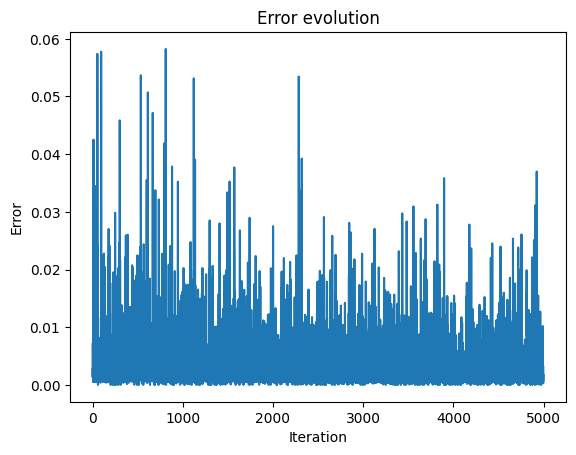

In [22]:
w_cancer = sgd_empirical_risk(X_train, y_train, learning_rate = 1e-3, err = 1e-5, max_iter = 5000, plot = True)

In [23]:
# Prediction over the test set
y_hat_cancer = np.sign(np.dot(X_test, w_cancer))
for i in range(len(y_hat_cancer)):
    if y_hat_cancer[i] == 0:
        y_hat_cancer[i] = np.random.choice([-1, 1])
accuracy_sgd = np.sum(y_hat_cancer == y_test) / len(y_test)
print("The accuracy of the prediction over the test set is ", accuracy_sgd)

The accuracy of the prediction over the test set is  0.8467153284671532


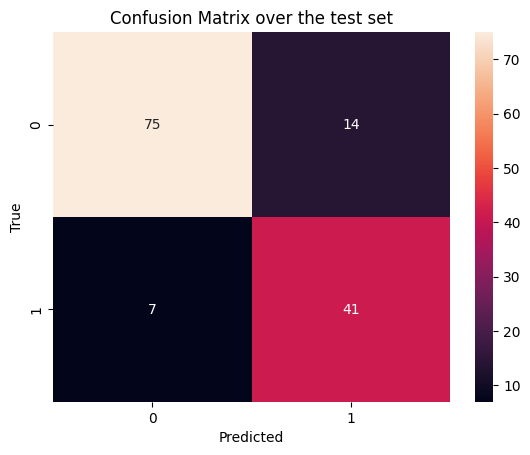

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_hat_cancer)
# COnfusion matrix with SeaBorn
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix over the test set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



#### Comments

Text(0, 0.5, 'Accuracy')

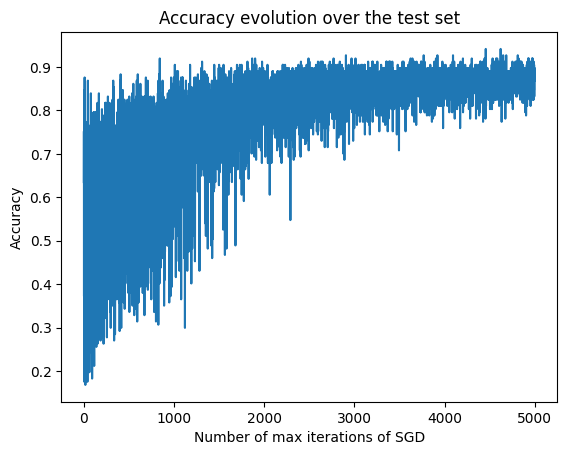

In [25]:
acc_step = []
for i in range(5000):
    w_cancer = sgd_empirical_risk(X_train, y_train, learning_rate = 1e-3, err = 1e-5, max_iter = i, plot = False)
    y_hat_cancer = np.sign(np.dot(X_test, w_cancer))
    for i in range(len(y_hat_cancer)):
        if y_hat_cancer[i] == 0:
            y_hat_cancer[i] = np.random.choice([-1, 1])
    accuracy = np.sum(y_hat_cancer == y_test) / len(y_test)
    acc_step.append(accuracy)

plt.plot(acc_step)
plt.title("Accuracy evolution over the test set")
plt.xlabel("Number of max iterations of SGD")
plt.ylabel("Accuracy")

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print("The accuracy of the prediction over the test set using Logistic Regression is ", accuracy_lr)

The accuracy of the prediction over the test set using Logistic Regression is  0.9635036496350365


In [27]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print("The accuracy of the prediction over the test set using a SVM classifier is ", accuracy_svm)

The accuracy of the prediction over the test set using a SVM classifier is  0.9562043795620438


In [28]:
results = pd.DataFrame({'SGD': [accuracy_sgd], 'Logistic Regression': [accuracy_lr], 'SVM': [accuracy_svm]})
results.index = ['Accuracy']
results

,SGD,Logistic Regression,SVM
Accuracy,0.846715,0.963504,0.956204


In this case, the dataset being rather small, we are not in the kind of settings where we would expect SGD to make a remarkable difference. <br>